Vale salientar que eu baixei o arquivo "dicio.txt" do diretamento do repositorio no GitHub. Outra opção seria  clonar o repositório em meu computador usando git a partir da linha de comando, uma vez que eu tenho git instalado e configurado em meu computador. 

#### Link do repositorio: https://github.com/fserb/pt-br 

#### Bibliotecas utilizadas: 
* Matplotlib
* Pandas 
* Collections 
* PyCirclize 

### Lendo o arquivo e criando uma lista chamada "all_words" contendo as palavras do arquivo

In [17]:

with open('dicio.txt', 'r', encoding='utf-8') as dicio:
    all_words = dicio.readlines()

### Criando um subconjunto contendo apenas palavras com 5 letras 

In [18]:
five_letter= [word.strip() for word in all_words if len(word.strip()) == 5]

#print(five_letter)

### Aqui em criei um dicionário definindo que letras com acentuação seriam iguais a suas respectivas sem acenta


In [19]:
from collections import Counter

norm= {
    'a': 'a', 'á': 'a', 'â': 'a', 'ã': 'a','à': 'a',
    'e': 'e', 'é': 'e', 'ê': 'e', 'è': 'e',
    'i': 'i', 'í': 'i', 'ï': 'i',
    'o': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o',
    'u': 'u', 'ú': 'u', 'ü': 'u', 'û': 'u',
    'c': 'c', 'ç': 'c'
}

def norm_letter(letter):
    return norm.get(letter, letter)

counting_letter = Counter()
for word in five_letter:
    for letter in word:
        equal_letter = norm_letter(letter.lower())
        counting_letter[equal_letter] += 1

print(counting_letter)

type(counting_letter)

Counter({'a': 9940, 'o': 6415, 'i': 5533, 'e': 5487, 'r': 4375, 'u': 3422, 's': 3248, 'c': 2886, 'l': 2871, 'm': 2863, 't': 2371, 'n': 2298, 'd': 1670, 'p': 1636, 'b': 1634, 'g': 1493, 'v': 1121, 'f': 1071, 'x': 766, 'h': 608, 'j': 522, 'z': 516, 'q': 157, 'y': 11, 'w': 9, 'k': 7})


collections.Counter

## Visualização

### Importando o módulo Pyplot da biblioteca Matplotlib para plotar as frequências

In [20]:
import matplotlib.pyplot as plt

In [21]:
labels, values = zip(*counting_letter.items())

### Estilizando o gráfico a ser plotado

In [22]:
plt.rcParams.update({
    'axes.titlecolor':'grey',
    'font.size': 12,           # Tamanho da fonte
    'font.family': 'serif',    # Família da fonte
    'axes.titlesize': 20,      # Tamanho da fonte do título
    'axes.labelsize': 12,      # Tamanho da fonte dos rótulos dos eixos
    'xtick.labelsize': 15,     # Tamanho da fonte das etiquetas do eixo x
    'ytick.labelsize': 10,     # Tamanho da fonte das etiquetas do eixo y
    'figure.figsize': (12, 6), # Tamanho da figura
    'axes.facecolor': '#EAEAF2', # Cor de fundo dos eixos
    'axes.edgecolor': 'black',  # Cor das bordas dos eixos
    'axes.grid': True,          # Mostrar a grade
    'grid.color': '#CCCCCC',    # Cor da grade
    'grid.linestyle': '--',     # Estilo da linha da grade
})

### Plotando o gráfico de barras

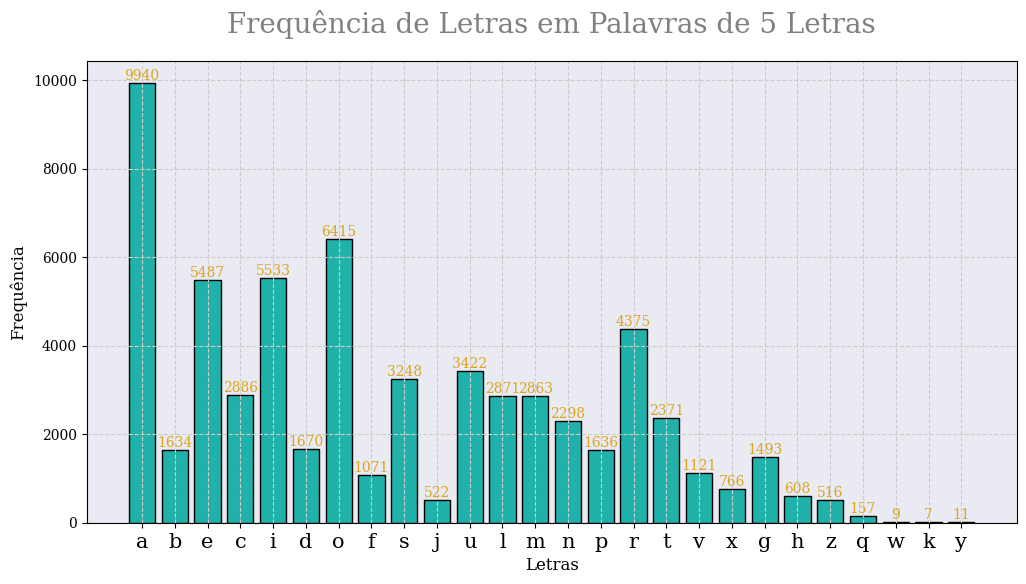

In [23]:


fig, ax = plt.subplots()
bars = ax.bar(labels, values, color='lightseagreen', edgecolor='black')

ax.set_title('Frequência de Letras em Palavras de 5 Letras', pad=20)
ax.set_xlabel('Letras')
ax.set_ylabel('Frequência')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0)

# Adicionando valores nas barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10,
    color = 'goldenrod')

plt.show()


# Outras Análises 

<mark> Aviso: as análises a seguir podem seriamente comprometer sua diversão com o jogo.

Após descobrir qual a vogal presente na palavra do dia "E SE" eu pudesse saber quais são as letras que com maior frequência acompanham aquela vogal?  

## Criando algumas funções

In [24]:
#Criando uma função para normalizar palavras
def normalize(word):
    return ''.join(norm.get(char, char) for char in word)

#Criando um funcao para identificar vogais normalizadas
def contains_vowel(word, vowel):
    return vowel in word

vowel_counters = {vowel: Counter() for vowel in 'aeiou'}


In [25]:
vowel_counters['a']

Counter()

In [26]:

#Atualizando contadores para palavras que contêm cada vogal normalizada
for word in five_letter:
    normalized_word = normalize(word)
    for vowel in 'aeiou':
        if contains_vowel(normalized_word, vowel):
            vowel_counters[vowel].update(normalized_word)

#Exibindo as letras mais frequentes para cada vogal
for vowel, counter in vowel_counters.items():
    print(f"Letras frequentes em palavras contendo a vogal '{vowel}':")
    for letter, freq in counter.most_common():
        print(f"  {letter}: {freq}")


Letras frequentes em palavras contendo a vogal 'a':
  a: 9940
  o: 2911
  i: 2880
  r: 2773
  e: 2268
  s: 1849
  u: 1780
  l: 1746
  c: 1646
  m: 1548
  t: 1390
  n: 1379
  b: 1029
  p: 1022
  g: 978
  d: 907
  f: 648
  v: 641
  j: 375
  h: 359
  z: 338
  x: 240
  q: 63
  k: 4
  w: 3
  y: 3
Letras frequentes em palavras contendo a vogal 'e':
  e: 5487
  a: 2365
  o: 1658
  r: 1633
  i: 1537
  s: 1310
  m: 1120
  l: 1041
  u: 988
  t: 960
  n: 902
  c: 785
  p: 655
  d: 636
  b: 582
  g: 516
  v: 436
  f: 399
  x: 204
  z: 192
  h: 191
  j: 178
  q: 96
  k: 4
  y: 3
  w: 2
Letras frequentes em palavras contendo a vogal 'i':
  i: 5533
  a: 3235
  o: 1924
  e: 1572
  r: 1428
  m: 1095
  s: 1081
  c: 1071
  l: 1012
  u: 982
  t: 877
  n: 853
  d: 666
  p: 609
  b: 577
  v: 524
  g: 493
  f: 426
  x: 424
  h: 184
  z: 175
  j: 155
  q: 79
  k: 2
  w: 2
  y: 1
Letras frequentes em palavras contendo a vogal 'o':
  o: 6415
  a: 3048
  i: 1863
  r: 1843
  e: 1650
  s: 1444
  c: 1287
  l: 1219


## Bora visualizar isso!

In [27]:
def plot_frequencia_letras(vogal, contador):
     
    letras, frequencias = zip(*contador.most_common())
    plt.figure(figsize=(10, 5))
    plt.bar(letras, frequencias)
    plt.title(f'Frequência de letras associadas à vogal "{vogal}"')
    plt.xlabel('Letras')
    plt.ylabel('Frequência')
    plt.show()



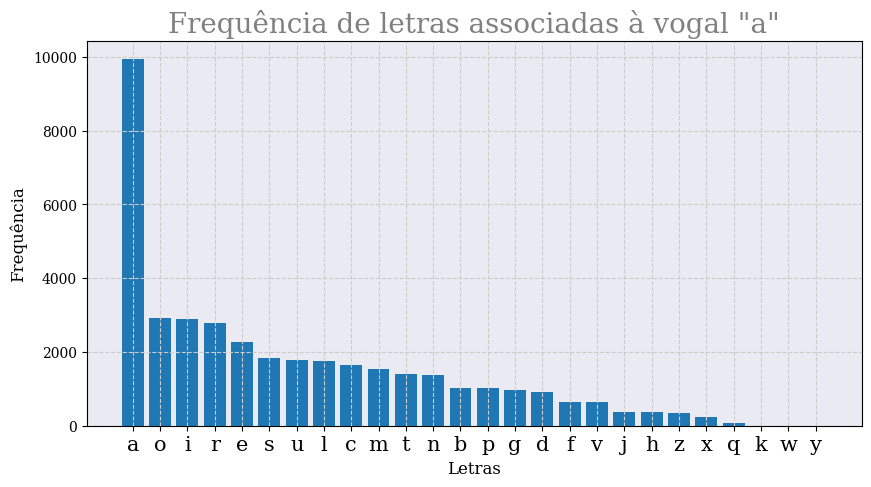

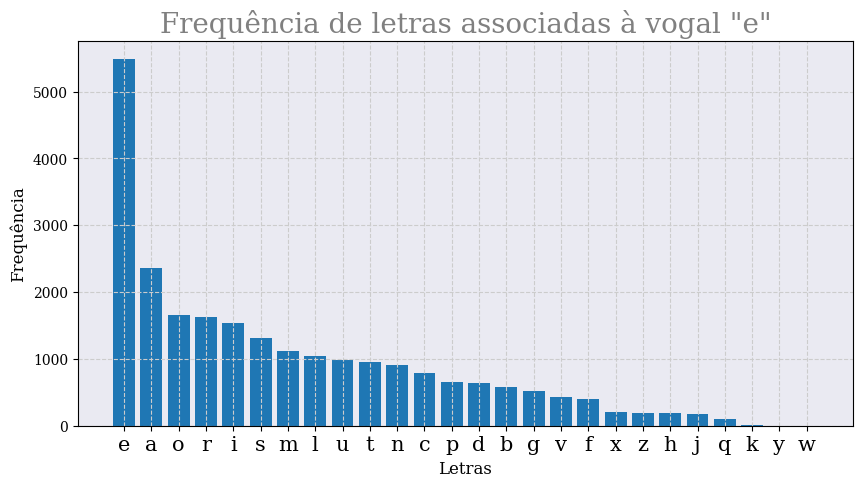

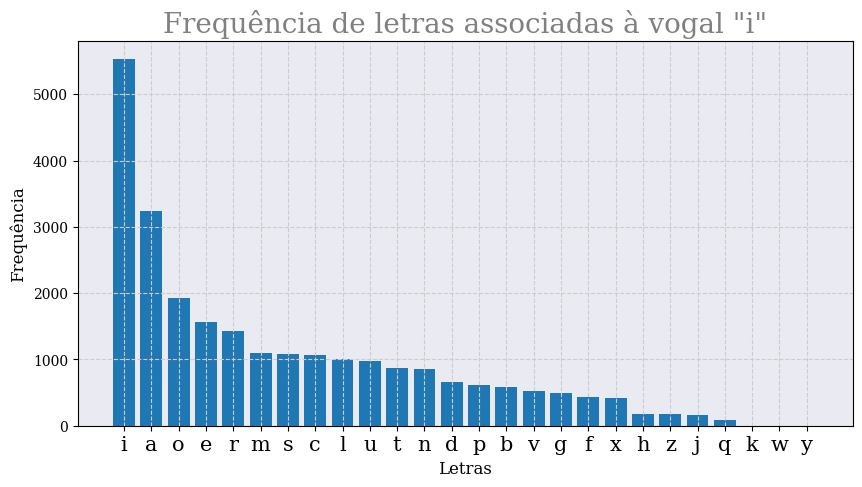

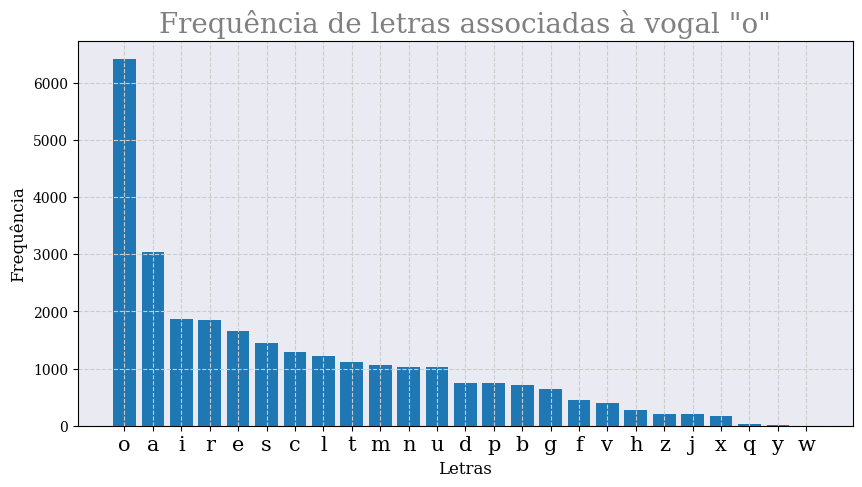

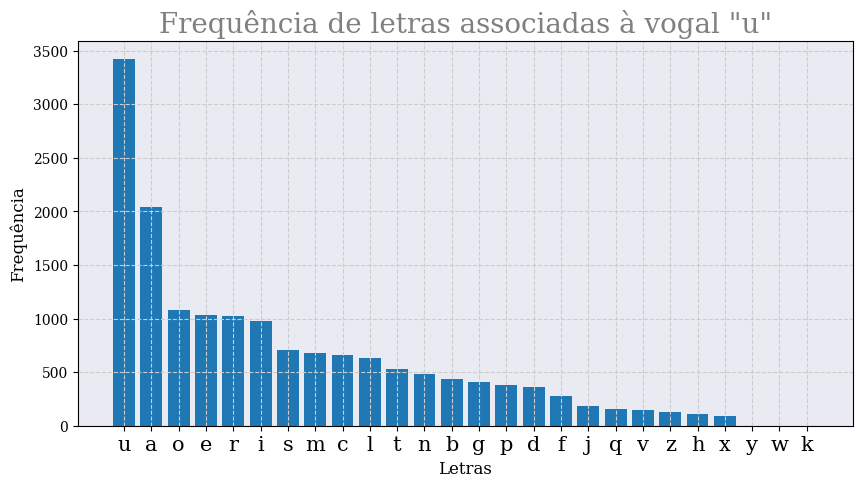

In [28]:
for vowel, counter in vowel_counters.items():
    plot_frequencia_letras(vowel, counter)


### Visualização em Circulos 

      a     b     c    d     e    f    g    h     i    j  ...    q     r  \
a  9940  1029  1646  907  2268  648  978  359  2880  375  ...   63  2773   
e  2365   582   785  636  5487  399  516  191  1537  178  ...   96  1633   
i  3235   577  1071  666  1572  426  493  184  5533  155  ...   79  1428   
o  3048   719  1287  751  1650  442  641  278  1863  198  ...   38  1843   
u  2043   439   661  363  1036  280  407  114   982  186  ...  157  1023   

      s     t     u    v  w    x  y    z  
a  1849  1390  1780  641  3  240  3  338  
e  1310   960   988  436  2  204  3  192  
i  1081   877   982  524  2  424  1  175  
o  1444  1117  1028  397  2  168  4  199  
u   706   528  3422  147  1   87  2  129  

[5 rows x 26 columns]


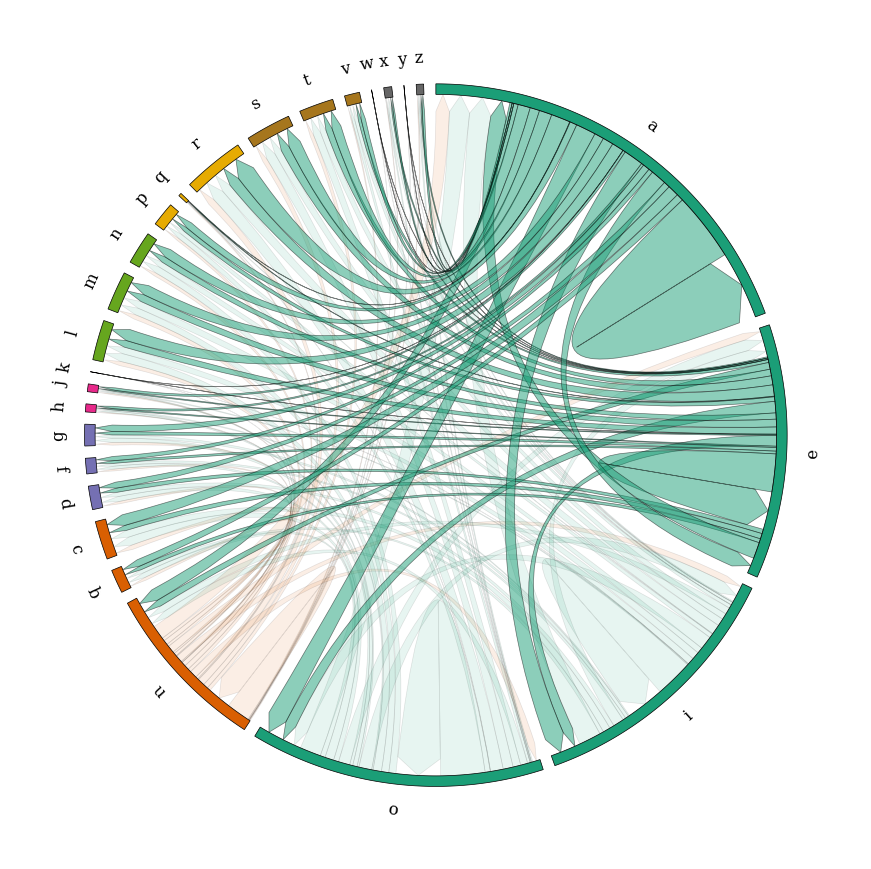

In [29]:
from pycirclize import Circos
import pandas as pd

connections = []

for vowel, counter in vowel_counters.items():
    for letter, freq in counter.items():
        if letter in 'abcdefghijklmnopqrstuvwxyz':  # Filtra apenas letras
            connections.append((vowel, letter, freq))

# Criar DataFrame a partir das conexões
vowel_labels = 'aeiou'
letter_labels = 'abcdefghijklmnopqrstuvwxyz'

matrix_data = []

for vowel in vowel_labels:
    row = []
    for letter in letter_labels:
        found = False
        for conn in connections:
            if conn[0] == vowel and conn[1] == letter:
                row.append(conn[2])
                found = True
                break
        if not found:
            row.append(0)
    matrix_data.append(row)

matrix_df = pd.DataFrame(matrix_data, index=list(vowel_labels), columns=list(letter_labels))

# Define link_kws handler function to customize each link property
def link_kws_handler(from_label: str, to_label: str):
    if from_label in ("a", "e"):
        # Set alpha, zorder values higher than other links for highlighting
        return dict(alpha=0.5, zorder=1.0)
    else:
        return dict(alpha=0.1, zorder=0)

# Initialize from matrix
circos = Circos.initialize_from_matrix(
    matrix_df,
    space=2,
    cmap="Dark2",
    label_kws=dict(size=12),
    link_kws=dict(direction=1, ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,
)

print(matrix_df)
fig = circos.plotfig()
plt.show()